<a href="https://colab.research.google.com/github/sathasivamn/LOGISTIC-REGRESSION/blob/main/Assignment_7_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

## Exploratory Data Analysis (EDA)
#### Load and explore the dataset.
#### Visualize data distributions.

## Data Preprocessing
#### Handle missing values.
#### Encode categorical variables.

## Train-Test Split

## Model Building & Training
#### Train a logistic regression model.

## Model Evaluation
#### Compute accuracy, precision, recall, F1-score, ROC-AUC.
#### Plot ROC curve.

## Feature Importance

## Deploy with Streamlit (Basic script)


In [55]:
#Install Streamlit
!pip install streamlit


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import streamlit as st  # For deployment

In [57]:
# Load the dataset
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [58]:
# Display basic info
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [59]:
# Check for missing values
print("\nMissing Values:\n", train_df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-60-770f2cfa8b39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["Survived"], palette="coolwarm")


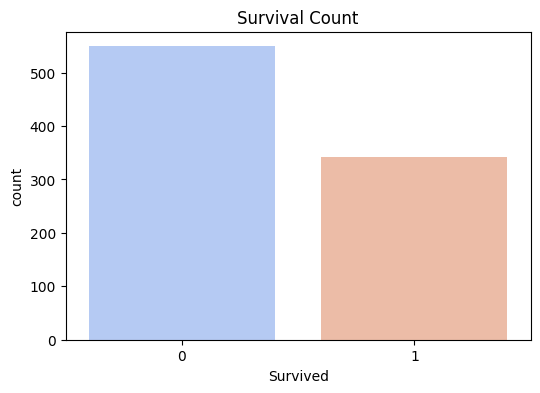

In [60]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x=train_df["Survived"], palette="coolwarm")
plt.title("Survival Count")
plt.show()

<ipython-input-61-c5836769200d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=train_df, palette="coolwarm")


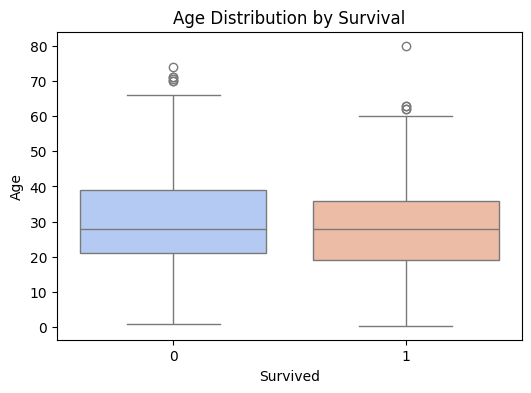

In [61]:
# Box plot for Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=train_df, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

In [62]:
# Data Preprocessing
# Fill missing Age values with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

<ipython-input-62-f646ec3e69d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
<ipython-input-62-f646ec3e69d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [63]:
# Fill missing Embarked values with mode
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

<ipython-input-63-7bd139d43d18>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
<ipython-input-63-7bd139d43d18>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [64]:
# Drop Cabin column (too many missing values)
train_df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
test_df.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)

In [65]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in ["Sex", "Embarked"]:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

In [66]:
# Define features and target variable
X = train_df.drop(columns=["Survived"])
y = train_df["Survived"]

In [67]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Build and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [70]:
# Predictions
y_pred = log_reg.predict(X_test)

In [71]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Model Performance:
Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1-score: 0.7552
ROC-AUC: 0.8819


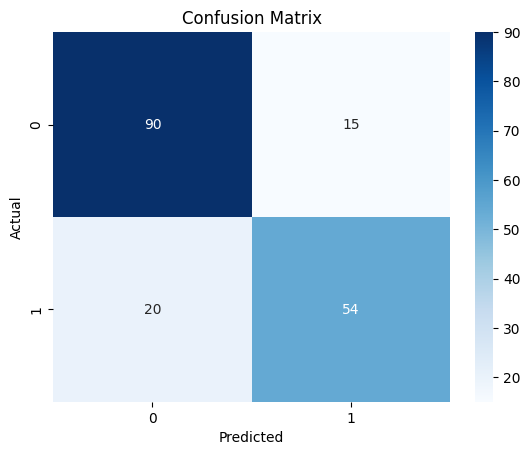

In [72]:
# # Confusion Matrix
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

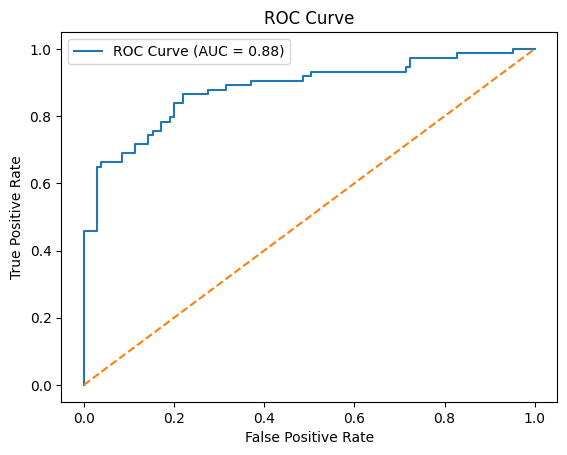

In [73]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<ipython-input-74-9afd4baf8a52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")


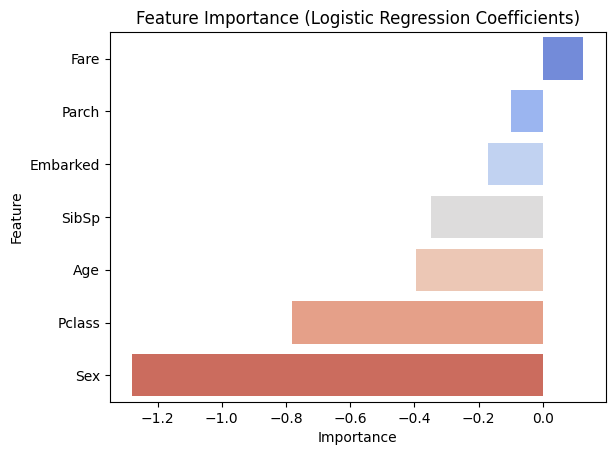

In [74]:
# Feature Importance (Coefficients)
importance = log_reg.coef_[0]
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# Streamlit App (Deployment)

In [75]:
import streamlit as st
import pickle
import numpy as np
import os

In [76]:
# Save the trained model before loading it (if not saved already)
# Assuming 'log_reg' is your trained Logistic Regression model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

# Get the absolute path of the current working directory
current_directory = os.getcwd()

# Load trained model using absolute path
model_path = os.path.join(current_directory, "logistic_model.pkl")
model = pickle.load(open(model_path, "rb"))

st.title("Titanic Survival Prediction")

2025-03-09 10:49:56.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [77]:
# User Inputs
pclass = st.selectbox("Pclass (1st, 2nd, 3rd)", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.number_input("Age", min_value=0, max_value=100, value=25)
sibsp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, max_value=600.0, value=30.0)
embarked = st.selectbox("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)", ["C", "Q", "S"])

2025-03-09 10:49:56.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [78]:
# Convert categorical to numerical
sex = 1 if sex == "Male" else 0
embarked_map = {"C": 0, "Q": 1, "S": 2}
embarked = embarked_map[embarked]

In [79]:
# Predict survival
input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])
prediction = model.predict(input_data)[0]

if st.button("Predict"):
    result = "Survived" if prediction == 1 else "Did Not Survive"
    st.write(f"Prediction: {result}")

2025-03-09 10:49:56.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-09 10:49:56.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# Interview Question Answers

## Precision vs Recall
#### Precision: Out of all predicted positives, how many were actually positive?
#### Recall: Out of all actual positives, how many were correctly predicted?

## Cross-validation
#### Splits data into multiple training/testing sets.
#### Prevents overfitting by testing the model on different subsets.